In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"salary_data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.shape

(30, 2)

In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [8]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
x = data['YearsExperience']
x = np.array(x).reshape(-1,1)
y = data['Salary']
y = np.array(y).reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [10]:
#Build the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [11]:
#Performance Evaluation

from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",round(mean_squared_error(Y_test,Y_pred),2))

Mean Squared Error: 49830096.86


In [13]:
#Predicting Result for single observation

new_df = pd.DataFrame({'YearsExperience':1.1},index = [0])
Y_pred1 = model.predict(new_df)
print(Y_pred1)

[[35687.77986711]]


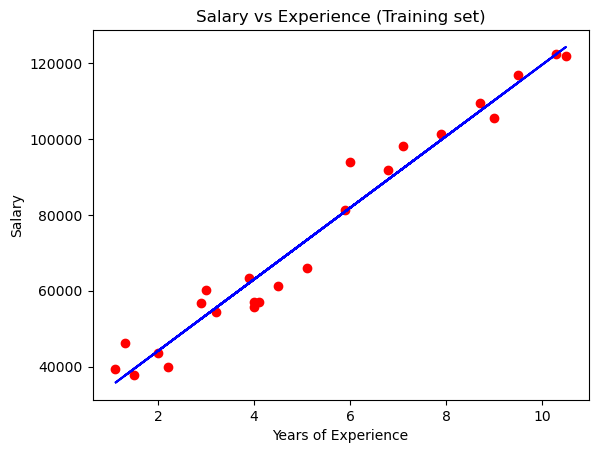

In [15]:
import matplotlib.pyplot as plot
plot.scatter(X_train, Y_train, color = 'red')
plot.plot(X_train, model.predict(X_train), color = 'blue')
plot.title('Salary vs Experience (Training set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

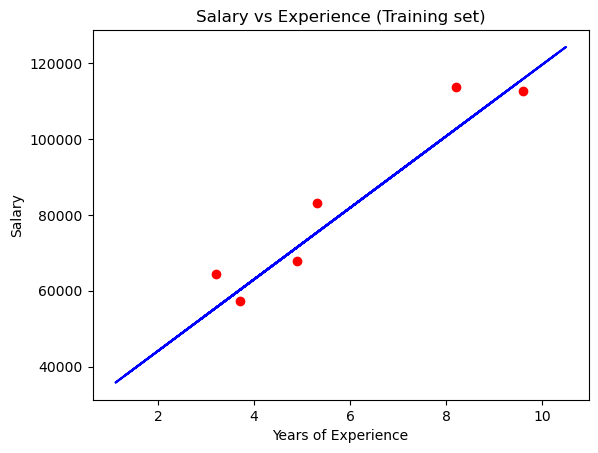

In [16]:
import matplotlib.pyplot as plot
plot.scatter(X_test, Y_test, color = 'red')
plot.plot(X_train, model.predict(X_train), color = 'blue')
plot.title('Salary vs Experience (Training set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

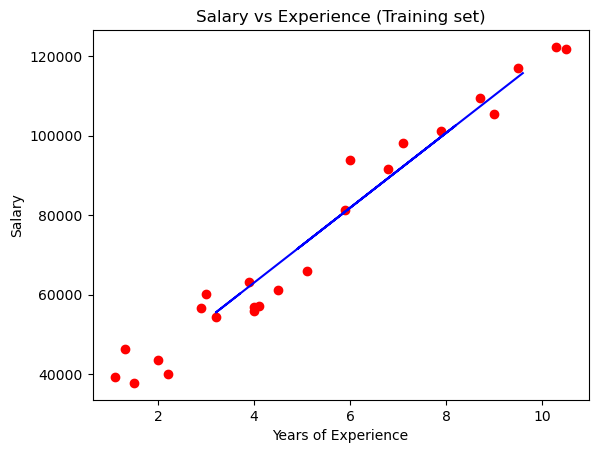

In [17]:
import matplotlib.pyplot as plot
plot.scatter(X_train, Y_train, color = 'red')
plot.plot(X_test, Y_pred, color = 'blue')
plot.title('Salary vs Experience (Training set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()